# MM2 Classification Project

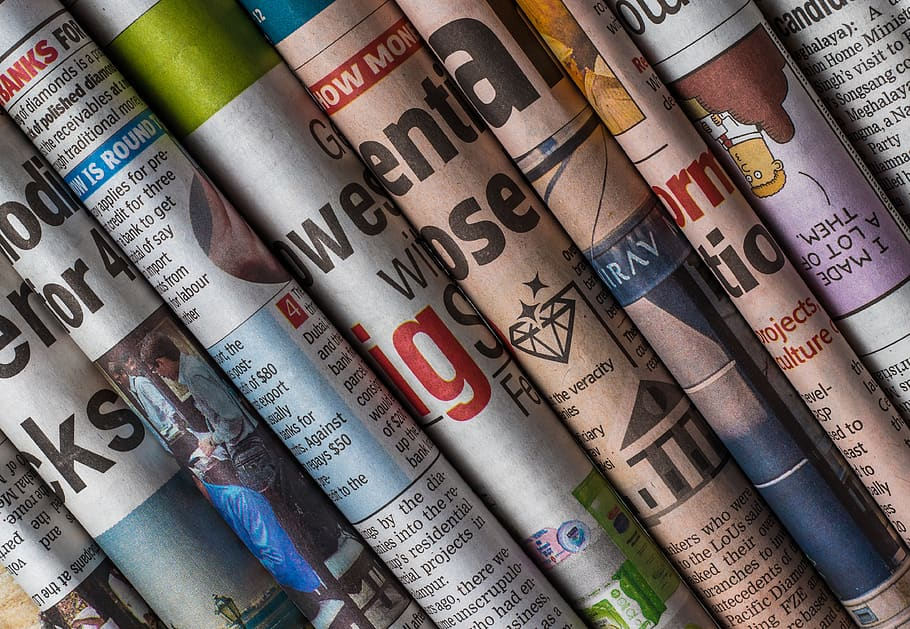

Table of contents:
* [1. Project Overview](#chapter1)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Data Preprocessing)](#chapter5)
* [6. Exploratory Data Analysis (EDA)](#chapter6)
* [7. Modelling](#chapter7)
* [8. Model evaluation metrics](#chapter8)
* [9. Model performance analysis](#chapter9)
* [10. Conclusion](#chapter10)
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Meet the team: <a class="anchor" id="section_1_1"></a>

> - Obed Segwate Mabowa 
    - <mabowaobed98@gmail.com>
> - Ndivhuwo Justin Tshifaro
    - <njtshifaro@gmail.com>
> - Sinenkosi Sikhakhane
    - <sikhakhanesnenkosi@gmail.com>
> - Ntokozo Sbusiso Hadebe
    - <bighope95@gmail.com>
> - 
    - <>
> - 
    - <>

### 1.1 Introduction: <a class="anchor" id="section_1_1"></a>

<b> Objective of the Project:</b>

<b> Data Source:</b>

<b> Importance of the Study:</b>

<b> Key Questions or Hypotheses:</b>

<b> Methodology Overview:</b>

<b> Structure of the Notebook:</b>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>
+ For data loading, manipulation, and analysis: `Pandas`, `csv`, `string`, `re`, `nltk`, `wordcloud` and `Numpy`.
+ For data visualization: `Matplotlib` and `Seaborn`

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [94]:
# Libraries for data loading, manipulation and analysis
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from collections import Counter

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')


## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the Data folder which contains two files `test.csv` and `train.csv`. To better manipulate and analyse the `test.csv` and `train.csv` files, it was loaded into a Pandas Data Frame using the Pandas function, `pd.read_csv()` and referred to as `train_data` and `test_data`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [95]:
# Loading the data
train_data = pd.read_csv('Data/processed/test.csv', index_col=False)
test_data = pd.read_csv('Data/processed/train.csv',index_col=False)

In [96]:
# Previewing the train data
print(f'Train cvs summary: {train_data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
Train cvs summary: None


In [97]:
# Previewing the test data
print(f'Test cvs summary: {test_data.info(2)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
Test cvs summary: None


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Data cleaning is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.

In [98]:
# Check for missing values
print(f'Missing values in the train dataset: {train_data.isnull().sum()}')
print(f'Missing values in the test dataset: {test_data.isnull().sum()}')

# Drop rows with missing values or fill them
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

# Summary statistics of the dataset
print(f'Summary statistics of the train dataset: {train_data.describe()}')
print(f'Summary statistics of the train dataset: {test_data.describe()}')

Missing values in the train dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64
Missing values in the test dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64
Summary statistics of the train dataset:                                                 headlines  \
count                                                2000   
unique                                               2000   
top     NLC India wins contract for power supply to Ra...   
freq                                                    1   

                                              description  \
count                                                2000   
unique                                               2000   
top     State-owned firm NLC India Ltd (NLCIL) on Mond...   
freq                                                    1   

                                                  content  \
count            

## 5. Data Preprocessing <a class="anchor" id="chapter5"></a>

This section covers the data preprocessing, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.

In [99]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

# Apply cleaning function to the text fields
train_data['cleaned_headlines'] = train_data['headlines'].apply(clean_text)
train_data['cleaned_description'] = train_data['description'].apply(clean_text)
train_data['cleaned_content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data[['cleaned_headlines', 'cleaned_description', 'cleaned_content']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_headlines,cleaned_description,cleaned_content
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...


# Vectorize the cleaned text fields
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned content
X = tfidf_vectorizer.fit_transform(train_data['cleaned_content'])

# Extract the target variable
y = train_data['category']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
cleaned_sample = X.shape, y.shape, X_train.shape, X_val.shape
print(f'Cleaned sample:{cleaned_sample}')

Cleaned sample:((2000, 5000), (2000,), (1600, 5000), (400, 5000))


### 5.1 Removing noise

removing unnecessary information to get the data into a usable format. The code remove the following.
- Remove the web-url for train_data.
- Remove the web-url for test_data.


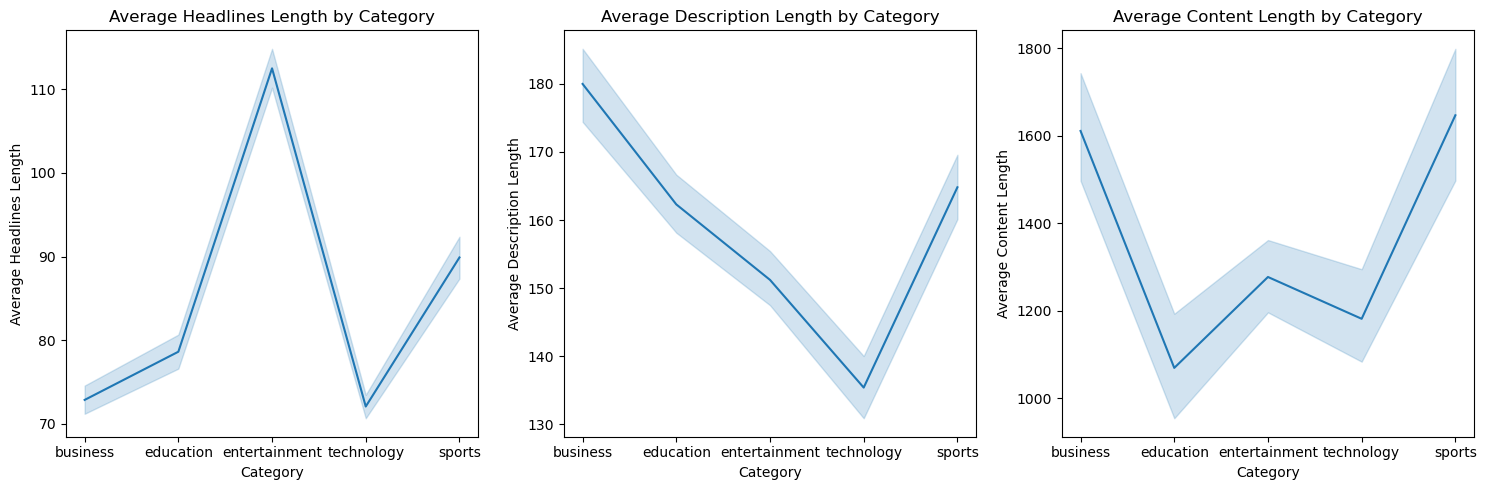

In [102]:
plt.figure(figsize=(15, 5))

pattern_url =  r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
url = r'url-web'
train_data['url'] = train_data['url'].replace(to_replace = pattern_url, value = url, regex = True)
test_data['url'] = test_data['url'].replace(to_replace = pattern_url, value = url, regex = True)
    


In [103]:
test_data.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,url-web,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,url-web,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,url-web,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,url-web,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,url-web,business


In [104]:
train_data.head()

,headlines,description,content,url,category,cleaned_headlines,cleaned_description,cleaned_content
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,url-web,business,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,url-web,education,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",url-web,entertainment,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",url-web,technology,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,url-web,business,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...


## 6. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter6"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

#### 6.1 EDA: Category Distribution

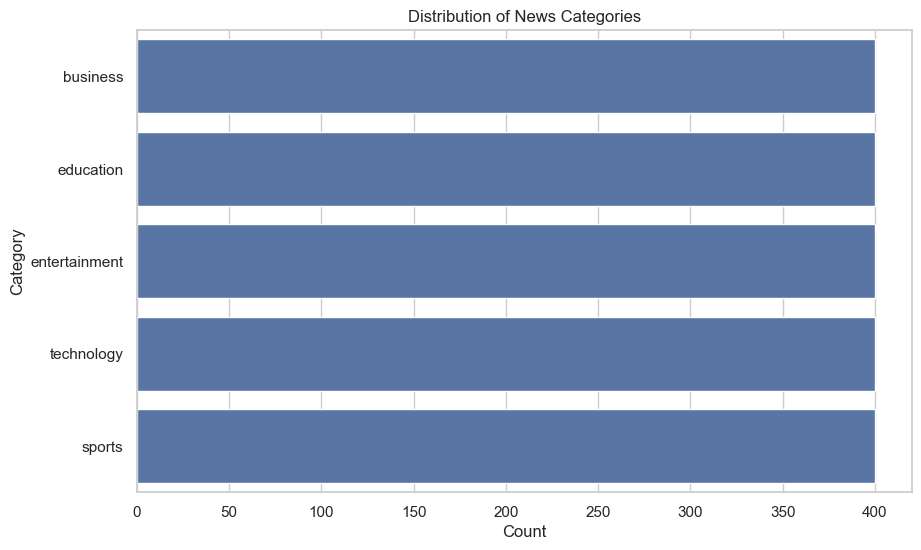

In [105]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### Interpretation

#### 6.2 EDA: Text Length Analysis

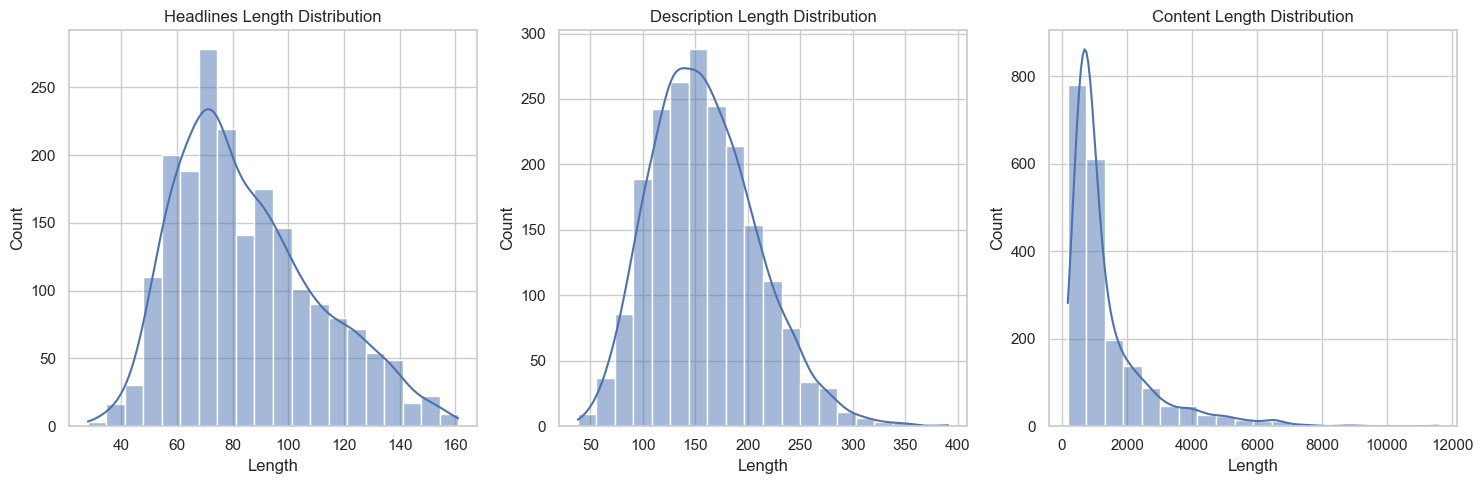

In [106]:
# Calculate the length of each text field
train_data['headlines_length'] = train_data['headlines'].apply(len)
train_data['description_length'] = train_data['description'].apply(len)
train_data['content_length'] = train_data['content'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data['headlines_length'], bins=20, kde=True)
plt.title('Headlines Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 2)
sns.histplot(train_data['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 3)
sns.histplot(train_data['content_length'], bins=20, kde=True)
plt.title('Content Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

#### Interpretation

#### 6.3 EDA: Text Length Distribution by Category

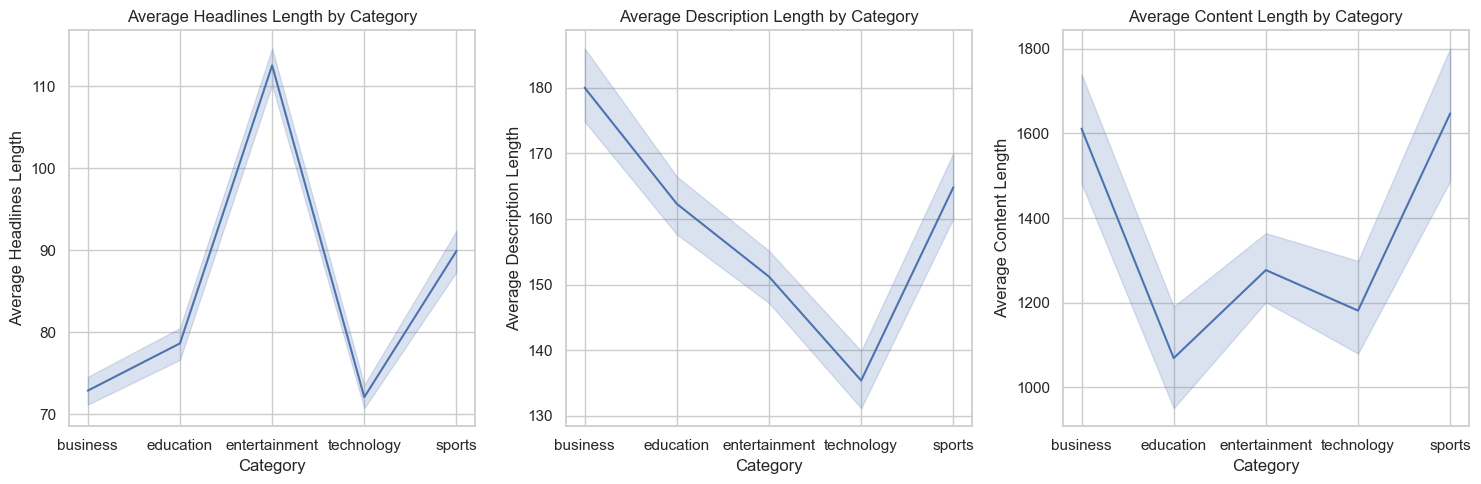

In [107]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=train_data, x='category', y='headlines_length', estimator='mean')
plt.title('Average Headlines Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Headlines Length')

plt.subplot(1, 3, 2)
sns.lineplot(data=train_data, x='category', y='description_length', estimator='mean')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')

plt.subplot(1, 3, 3)
sns.lineplot(data=train_data, x='category', y='content_length', estimator='mean')
plt.title('Average Content Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Content Length')

plt.tight_layout()
plt.show()

#### Interpretation

#### 6.4 Most Common Words in Each Category

In [108]:
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = train_data['category'].unique()
for category in categories:
    print(f"Most common words in {category}:")
    top_words = get_top_n_words(train_data[train_data['category'] == category]['cleaned_content'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("\n")

Most common words in business:
cent: 25.85797956169798
subscrib: 23.79329005873042
rs: 20.53596275517772
crore: 17.05985574701608
said: 15.748554838479821
bank: 14.226630350951567
india: 12.866716837659606
stori: 10.930268572354192
market: 10.33371812809815
compani: 10.278838905213567


Most common words in education:
student: 18.041342943802196
exam: 16.09939805230309
result: 13.144409031684463
univers: 12.84598584846583
institut: 12.048390321441822
subscrib: 12.038709630822499
read: 11.510634261208326
class: 11.416893253351926
iit: 11.113816854234164
educ: 10.922532014326464


Most common words in entertainment:
film: 20.69274791101496
latest: 16.375212883562376
news: 15.992247904356141
updat: 15.862343803971656
stori: 13.646227750597818
actor: 12.87821198990533
regist: 12.236727713434668
rs: 11.849633588924025
crore: 11.061458987649731
said: 10.517750178363036


Most common words in technology:
stori: 13.563391445029307
regist: 13.187967340567365
ai: 12.933171742312062
googl: 12.788

#### 6.5 WordCloud

In [109]:
# Word Cloud for each column
def plot_word_cloud(df, title):
    text = " ".join(review for review in df.astype(str).values.flatten())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

Word Cloud for each column in the Train Data

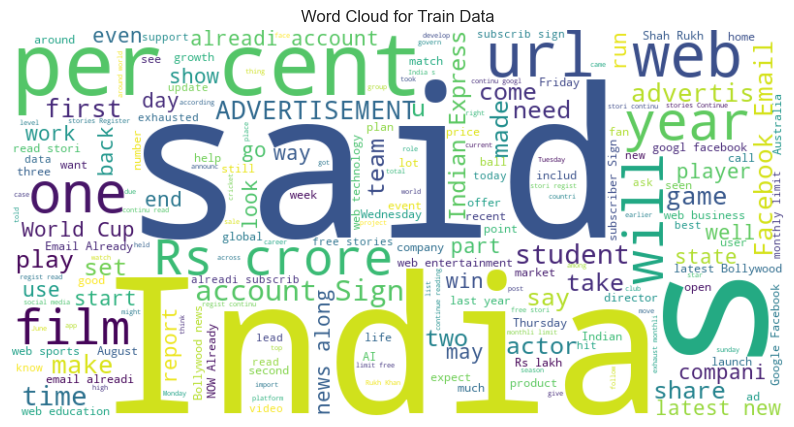

In [110]:
# Word Cloud for each column in the Train Data
plot_word_cloud(train_data, 'Word Cloud for Train Data')

#### Interpretation:

Word Cloud for each column in the Test Data

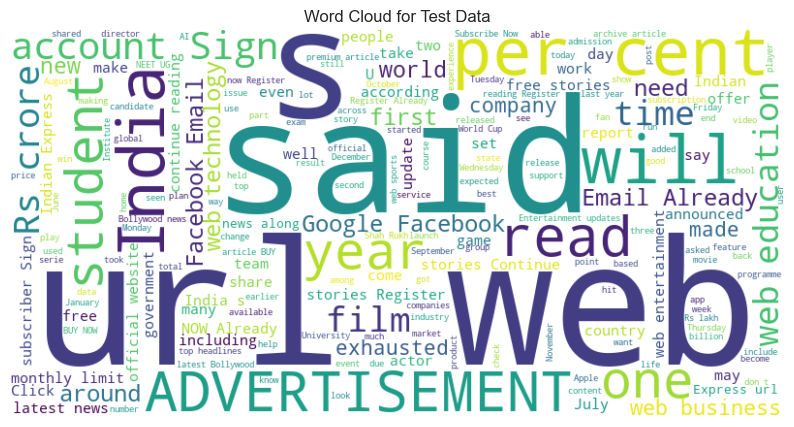

In [111]:
# Word Cloud for each column in the Test Data
plot_word_cloud(test_data, 'Word Cloud for Test Data')

### Interpretation:

## 7. Modelling <a class="anchor" id="chapter7"></a>

Model Training
Logistic Regression
Naive Bayes
Support Vector Machine (SVM)
Random Forest
Neural Network (MLPClassifier)

In [112]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(max_iter=1000)
}

## 8. Model evaluation metrics <a class="anchor" id="chapter8"></a>

In [113]:
# Training and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    results[model_name] = {'accuracy': accuracy, 'f1_score': f1, 'classification_report': classification_report(y_val, y_pred)}

In [114]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print(f"Classification Report:\n{metrics['classification_report']}\n")

Model: Logistic Regression
Accuracy: 0.9725
F1 Score: 0.9724346889897368
Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.96      0.96        73
    education       0.99      0.99      0.99        80
entertainment       0.99      0.98      0.98        81
       sports       0.98      1.00      0.99        86
   technology       0.95      0.94      0.94        80

     accuracy                           0.97       400
    macro avg       0.97      0.97      0.97       400
 weighted avg       0.97      0.97      0.97       400


Model: Naive Bayes
Accuracy: 0.98
F1 Score: 0.9799168545138645
Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.96      0.97        73
    education       0.99      1.00      0.99        80
entertainment       0.99      0.99      0.99        81
       sports       0.99      1.00      0.99        86
   technology       0.96      0.95      0.9

### 8.1 Model Analysis
Logistic Regression performs very well with high accuracy and F1 score. It shows strong performance across all classes, particularly notable for its balanced precision and recall.

Naive Bayes achieves the highest accuracy and F1 score among all models evaluated. It demonstrates excellent precision and recall across all classes, indicating robust performance in classifying news articles.

SVM shows strong performance with high accuracy and F1 score. It performs consistently well across most classes, although slightly lower than Naive Bayes in overall metrics.

Random Forest performs well with decent accuracy and F1 score. It demonstrates good performance in some classes but shows slightly lower metrics compared to Naive Bayes and Logistic Regression.

Naive Bayes stands out as the top-performing model in this evaluation, achieving the highest accuracy and F1 score. It consistently shows strong precision and recall across all classes, making it the recommended choice for this classification task based on the provided data and evaluation results.

## 9. Model performance analysis <a class="anchor" id="chapter9"></a>

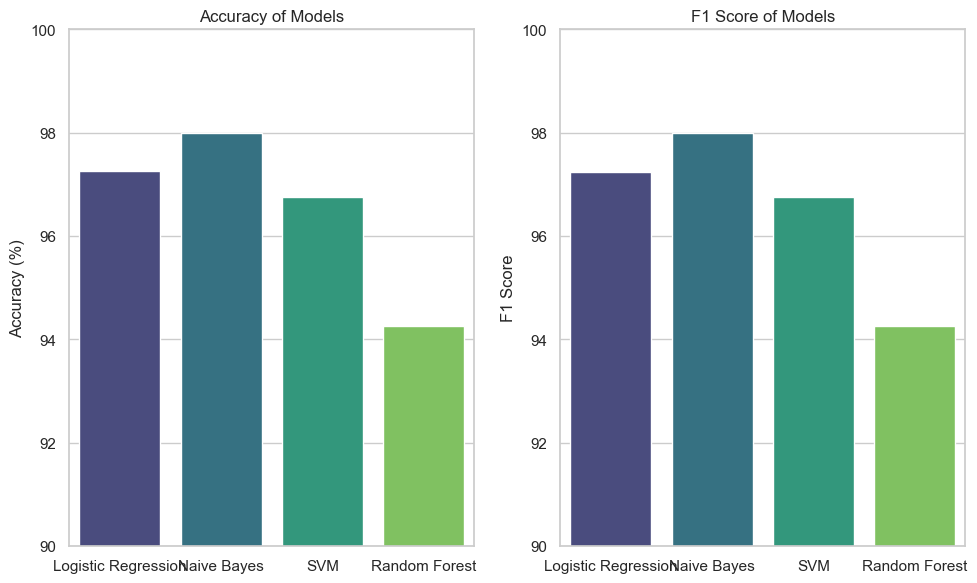

In [115]:
# Data for models
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
accuracy = [97.25, 98.00, 96.75, 94.25]
f1_score = [97.24, 97.99, 96.76, 94.25]

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Plotting accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.ylim([90, 100])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Models')

# Plotting F1 score
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=f1_score, palette='viridis')
plt.ylim([90, 100])
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

## 10. Conclusion <a class="anchor" id="chapter10"></a>

<b> Summary of Key Findings:</b>

<b> Evaluation of the Methodology:</b>

<b> Implications of the Findings:</b>

<b> Suggestions for Future Work:</b>

<b> Reflection on the Data Source and Quality:</b>

<b> Concluding Thoughts:</b>

## 11. References <a class="anchor" id="chapter11"></a>